In [16]:
import torch

In [17]:
def synthetic_data(w,b,num):
    X = torch.normal(0,1,(num,len(w)))
    Y = torch.matmul(X,w)+b
    Y = torch.tanh(Y)
    Y += torch.normal(0,0.01,Y.shape)
    return X,Y.reshape([-1,1])

true_w = torch.tensor([3.2,2.5])
true_b = 3.2

features, labels = synthetic_data(true_w,true_b,100)

In [18]:
import matplotlib.pyplot as plt

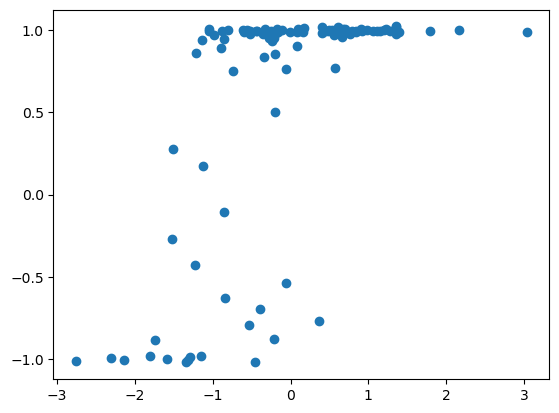

In [19]:
with torch.no_grad():
    plt.scatter(features[:,0].reshape(labels.shape),labels)

In [20]:
from torch.utils.data import DataLoader,TensorDataset
def load_array(data_arrays,batch_size,is_train=True):
    dataset = TensorDataset(*data_arrays)
    return DataLoader(dataset,batch_size,shuffle=is_train)

In [21]:
def train(net,optimizer,loss,data_iter,epochs):
    loss_table = []
    for epoch in range(epochs):
        for X,y in data_iter:
            l = loss(net(X),y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        with torch.no_grad():
            current_loss = loss(net(X),y)
            loss_table.append(current_loss.mean())
            #print(current_loss.mean())
    return loss_table

In [22]:
data_iter = load_array((features,labels),10)

In [23]:
net = torch.nn.Sequential(torch.nn.Linear(features.shape[1],8),
                          torch.nn.ReLU(),
                          torch.nn.Linear(8,4),
                          torch.nn.ReLU(),
                          torch.nn.Linear(4,labels.shape[1]))

In [24]:
torch.nn.init.xavier_normal_(net[0].weight)
torch.nn.init.xavier_normal_(net[2].weight)
net[0].bias.data.fill_(0)
net[2].bias.data.fill_(0)
print(net[0].weight.data)

tensor([[ 0.1426, -0.9494],
        [ 0.1423, -0.1995],
        [-0.5535, -0.4170],
        [-0.2892,  0.0654],
        [-0.7729,  0.4226],
        [-0.5051, -0.0326],
        [-0.1044,  0.1596],
        [-0.5148,  0.1994]])


In [25]:
optimizer = torch.optim.SGD(net.parameters(),0.003)
loss = torch.nn.MSELoss()

In [26]:
epochs = 100
loss_table = train(net,optimizer,loss,data_iter,epochs)

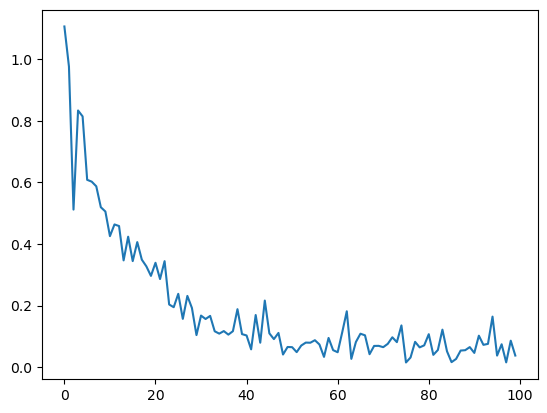

In [27]:
epoches = list(range(len(loss_table)))
plt.plot(epoches,loss_table)

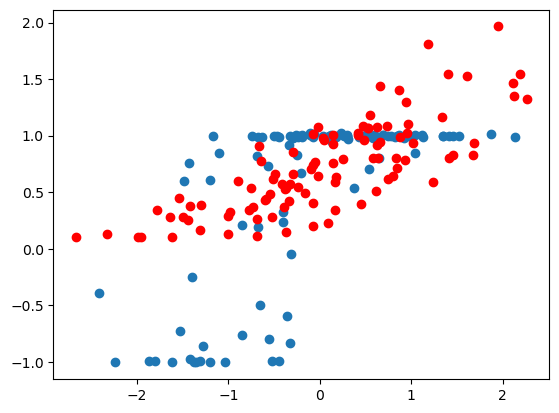

In [13]:
new_features = torch.normal(0,1,[100,2])
predict = net(new_features)
plt.scatter(features[:,0].reshape(labels.shape),labels)
plt.scatter(new_features[:,0].reshape(labels.shape),predict.detach(),c='red')

In [14]:
true_Y = torch.matmul(new_features,true_w)+true_b
true_Y = torch.tanh(true_Y)
true_Y += torch.normal(0,0.01,true_Y.shape)

print(loss(net(new_features),true_Y).mean().detach())

tensor(0.5556)


/home/lixiaobai/.conda/envs/torch/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


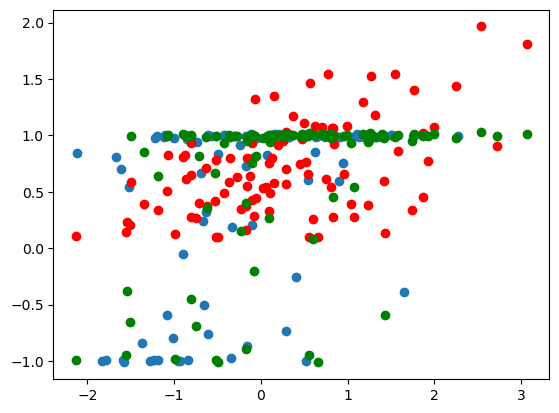

In [15]:
plt.scatter(features[:,0].reshape(labels.shape),labels)
plt.scatter(new_features[:,0].reshape(labels.shape),predict.detach(),c='red')
plt.scatter(new_features[:,0].reshape(labels.shape),true_Y.detach(),c='green')